In [1]:
!pip install scikit-plot

In [2]:
# Linear Algebric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing learning
from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score

#Loading preprocessing pipline functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from sklearn.metrics import f1_score,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r'C:\Users\monish\Downloads\Micro-Credit-Project\Micro Credit Project\Data file.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


# Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# To check the missing value
data.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

# There is no missing value

In [6]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
##observation

#no missing value as mention
# we can drop columns Unnamed:0,pdate,msisdn,pcircle
# remove the outliers
# assign median vaue as the total value of loan
# we will find how many defaulter and non defaulter in label through counts

In [8]:
# dropping columns Unnamed:0,pdate,msisdn,pcircle as it is not providing any insight in our dataset
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.drop('pdate',axis=1,inplace=True)
data.drop('msisdn',axis=1,inplace=True)
data.drop('pcircle',axis=1,inplace=True)
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [9]:
data['1day_loan_amnt']=data['amnt_loans30']/data['cnt_loans30']
data['1day_loan_amnt']

0          6.0
1         12.0
2          6.0
3          6.0
4          6.0
          ... 
209588     6.0
209589     6.0
209590    10.5
209591     9.0
209592     9.0
Name: 1day_loan_amnt, Length: 209593, dtype: float64

In [10]:
data

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,1day_loan_amnt
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,6.0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,12.0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,6.0
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6.0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6.0
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6.0
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,10.5
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,9.0


In [14]:
list=[]
for i in data.columns:
    if data[i].dtypes!='object':
        list.append(i)
list

['label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [15]:
# To check,how many features are there in each column
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

label
1    183431
0     26162
Name: label, dtype: int64

aon
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64

daily_decr30
0.000000       4144
500.000000      829
1000.000000     569
700.000000      381
600.000000      354
               ... 
3565.333333       1
596.172000        1
700.126667        1
7604.514667       1
4108.476000       1
Name: daily_decr30, Length: 147026, dtype: int64

daily_decr90
0.000        4063
500.000       781
1000.000      490
700.000       343
600.000       316
             ... 
784.600         1
84.276          1
12853.830       1
1307.920        1
16839.040       1
Name: daily_decr90, Length: 158670, dtype: int64

rental30
0.00        7566
200.13      1379
99.56       1020
400.26       530
199.12       461
            ... 
1103.55       

# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

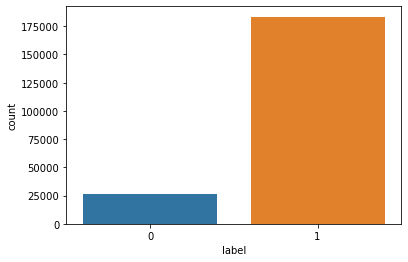

In [16]:
#plot each class frequency
sns.countplot(x='label',data=data)
plt.show

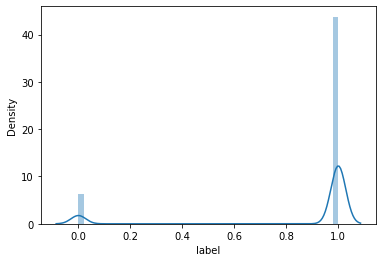

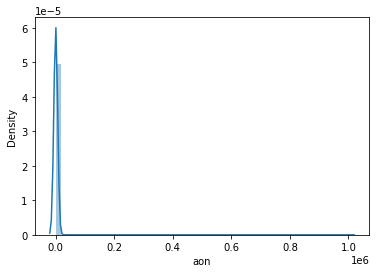

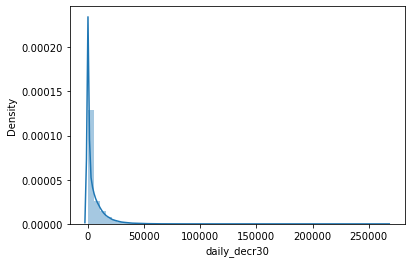

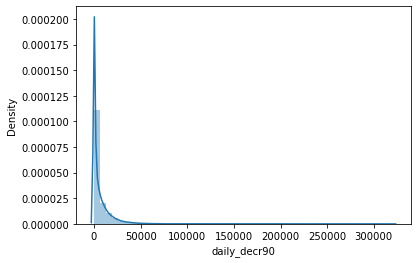

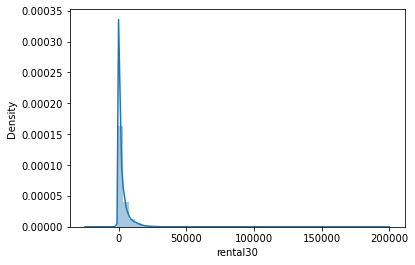

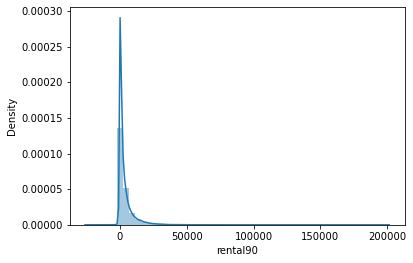

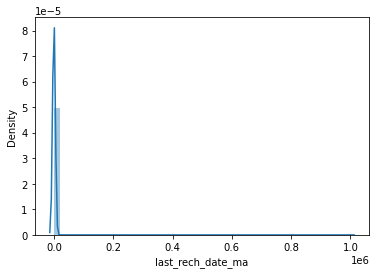

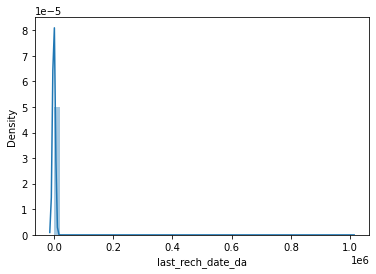

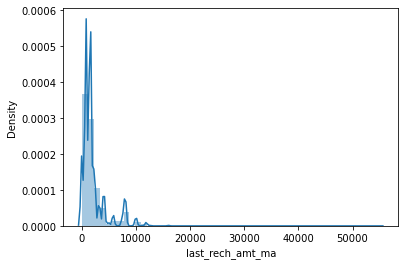

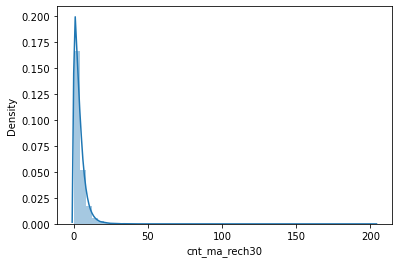

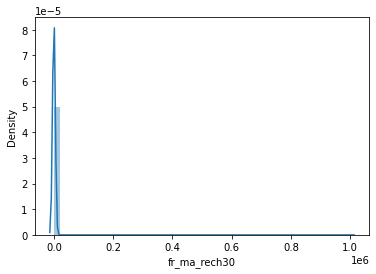

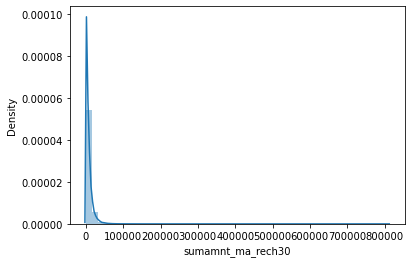

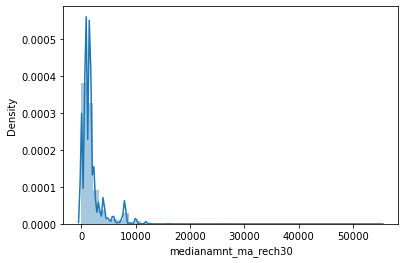

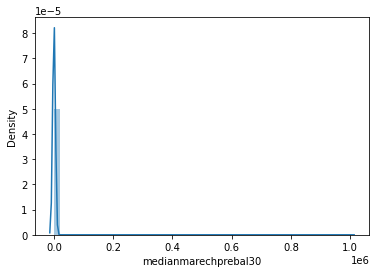

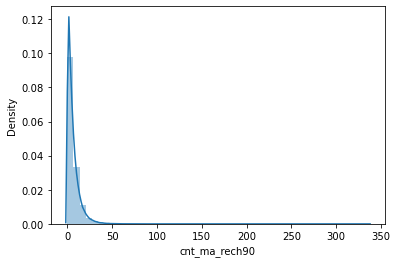

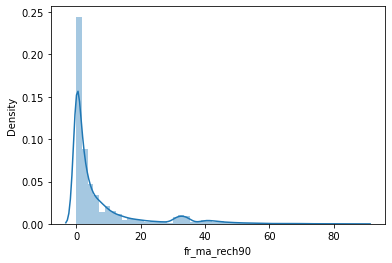

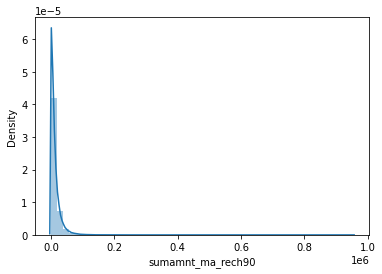

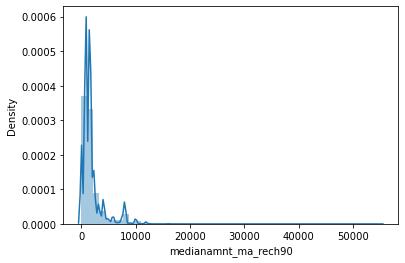

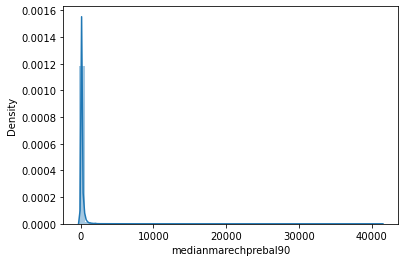

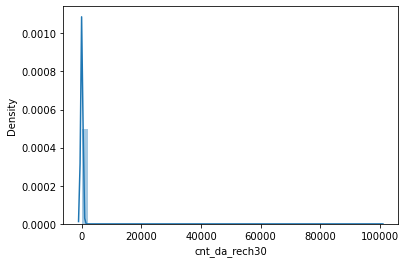

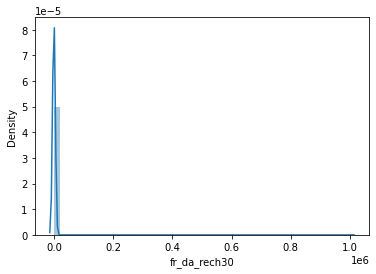

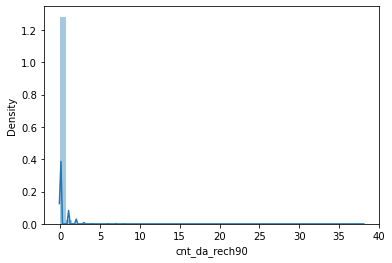

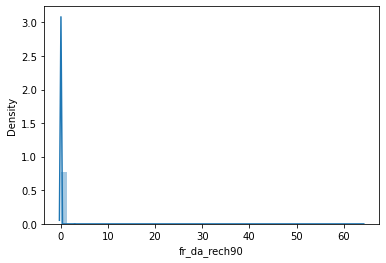

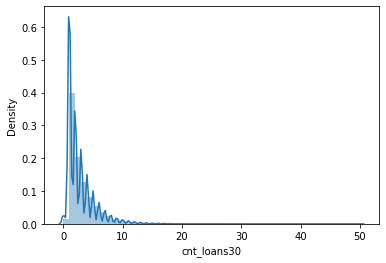

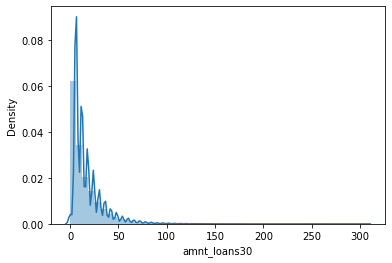

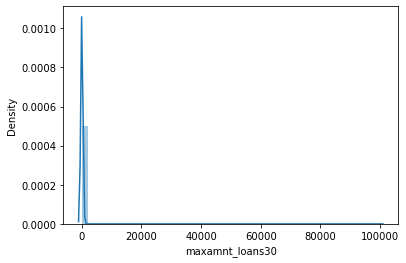

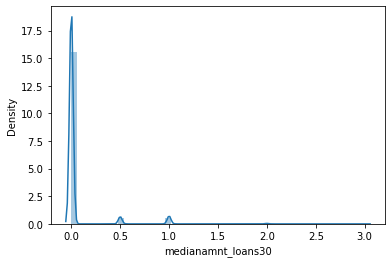

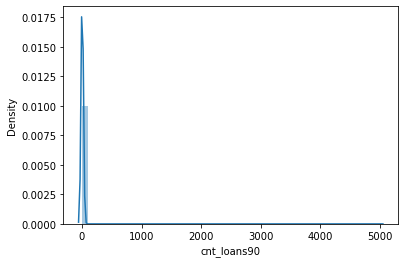

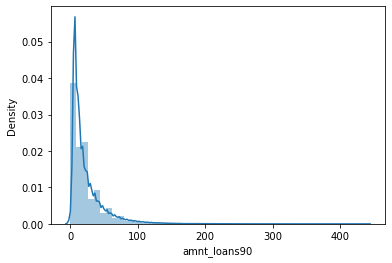

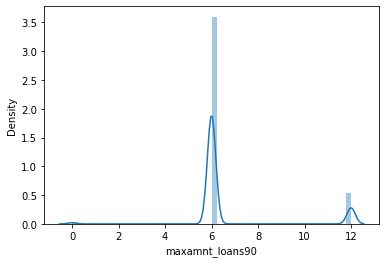

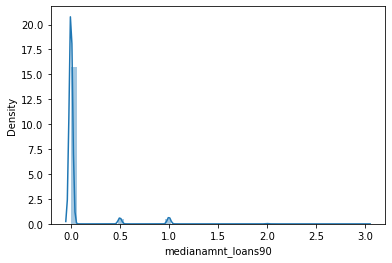

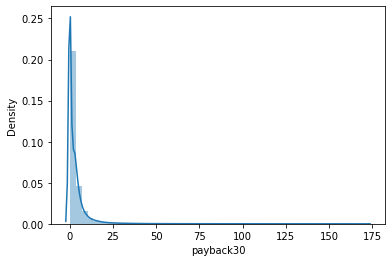

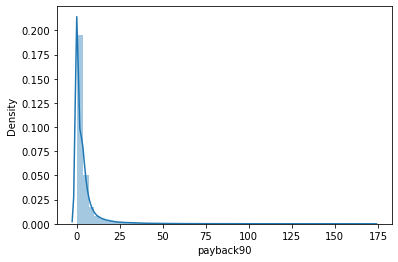

In [17]:
# Making of distplot to show the skewness in different columns
for g in data.describe().columns:
    sns.distplot(data[g])
    plt.show()

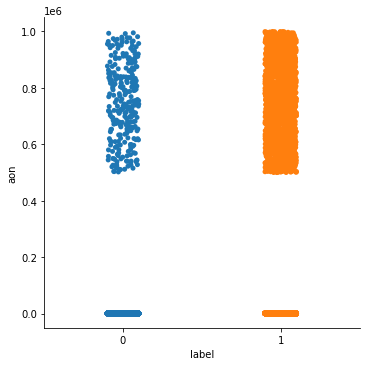

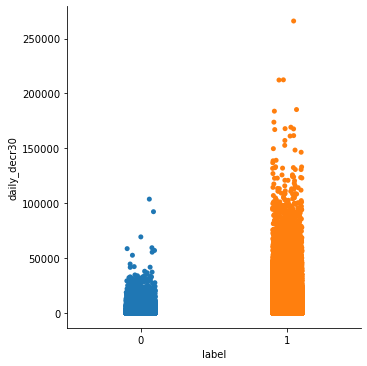

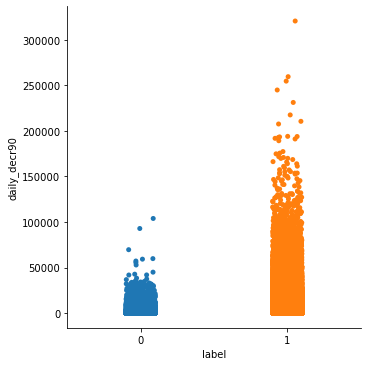

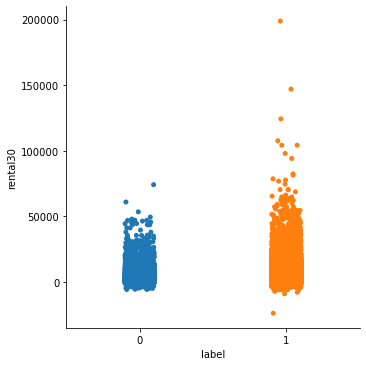

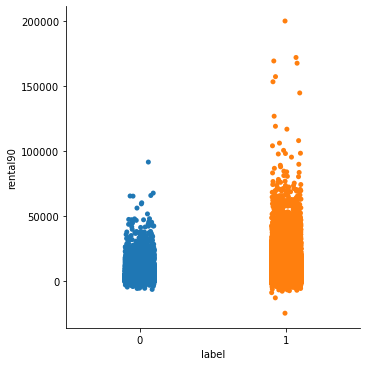

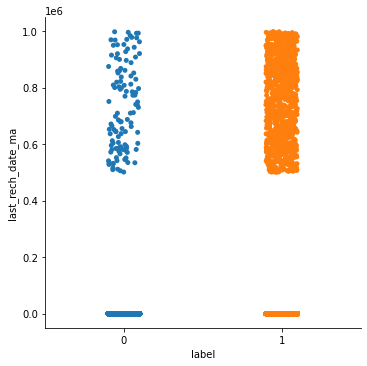

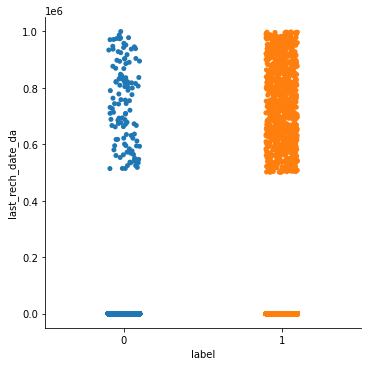

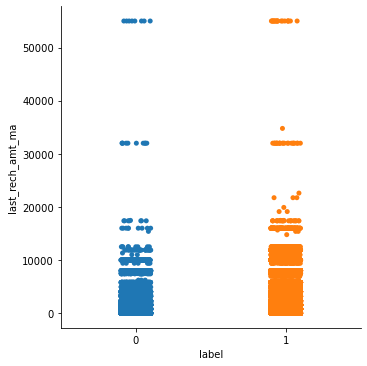

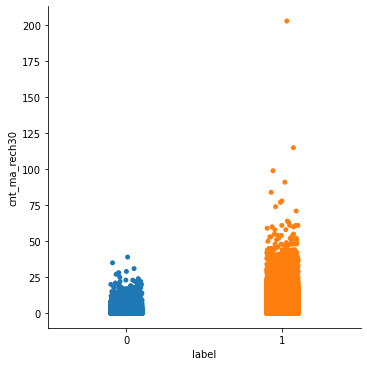

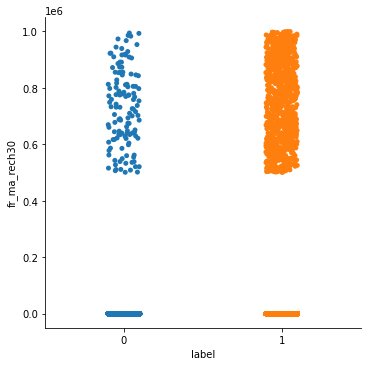

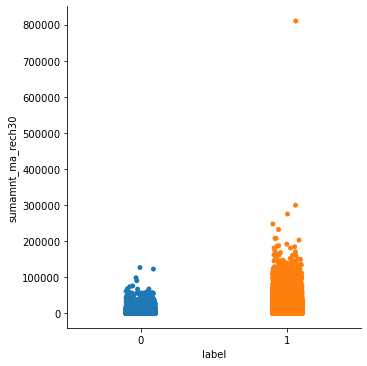

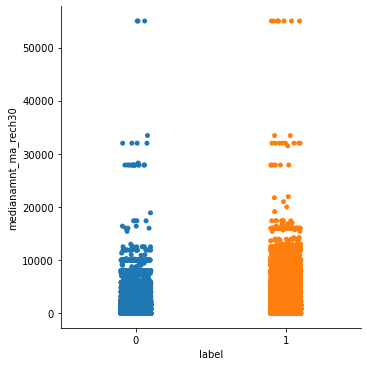

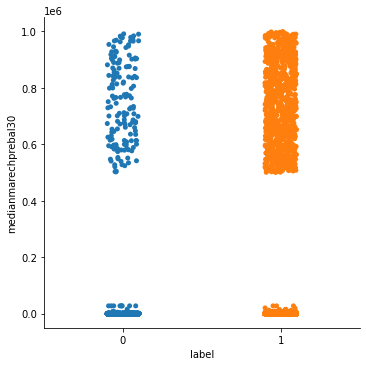

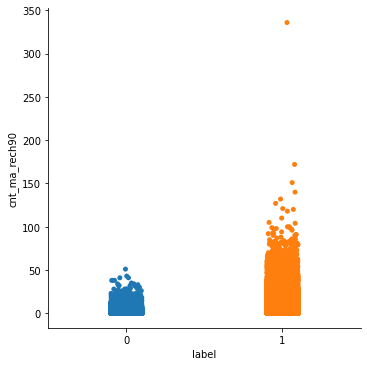

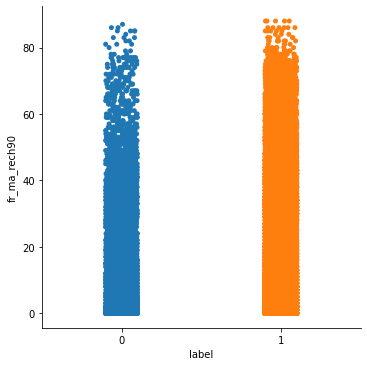

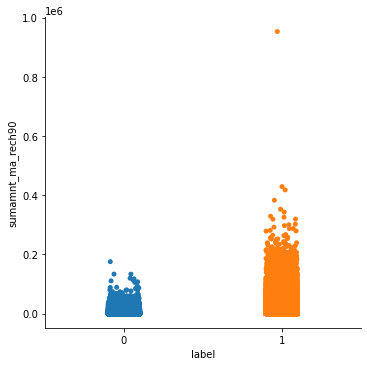

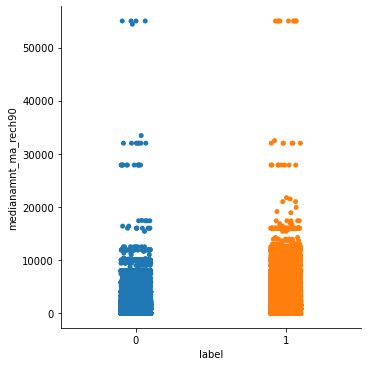

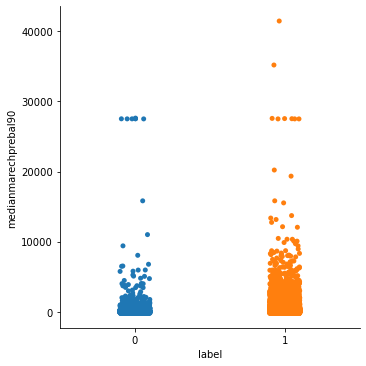

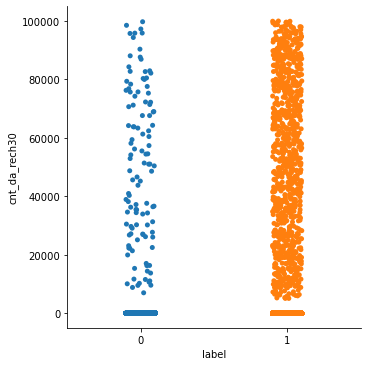

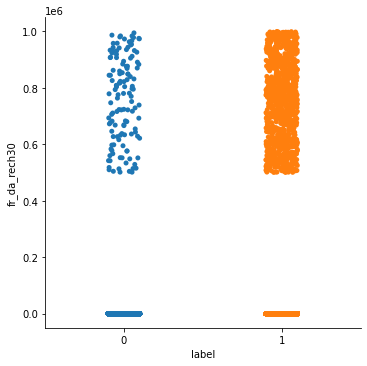

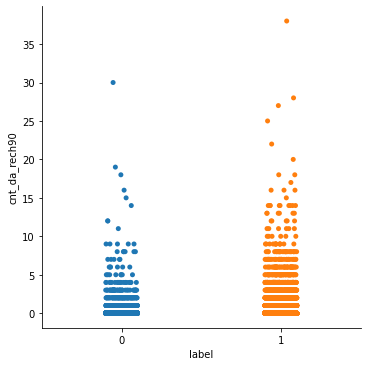

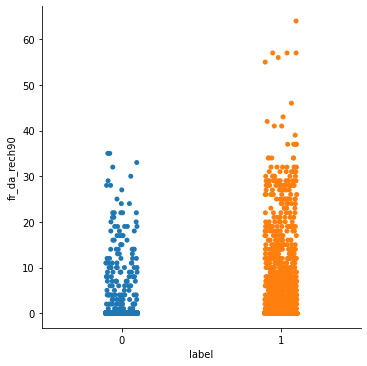

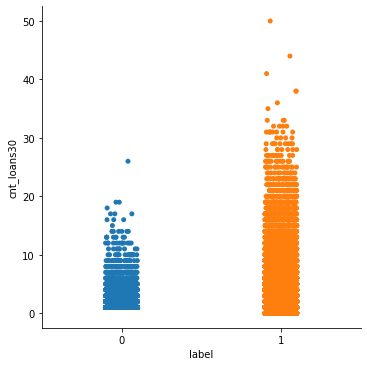

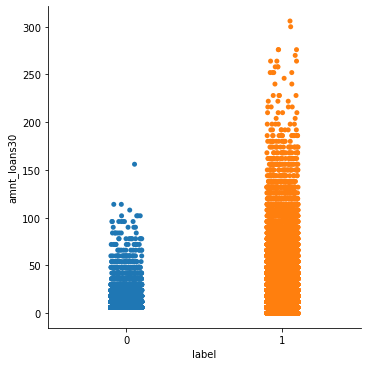

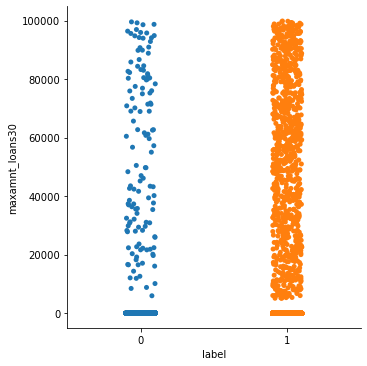

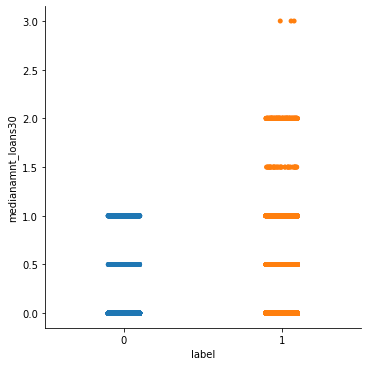

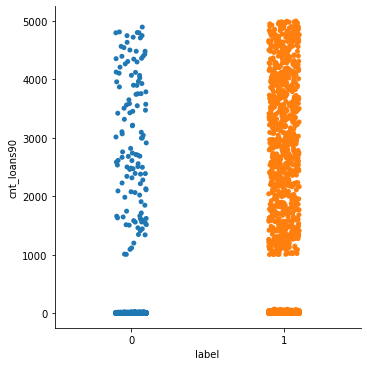

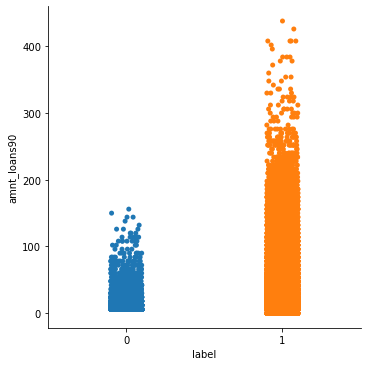

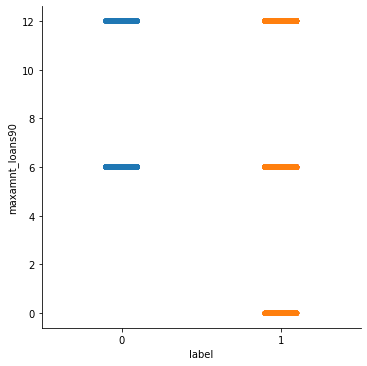

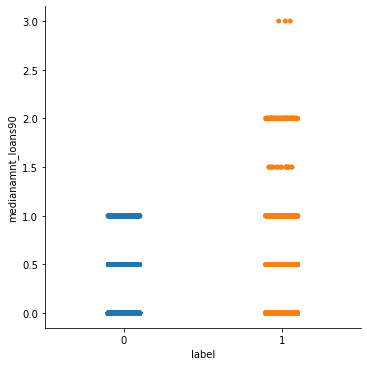

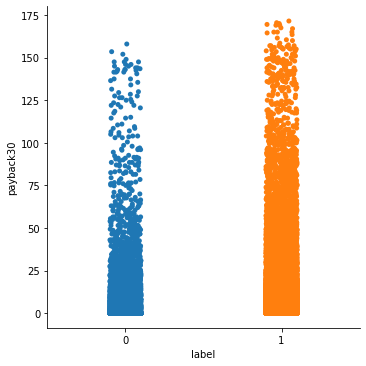

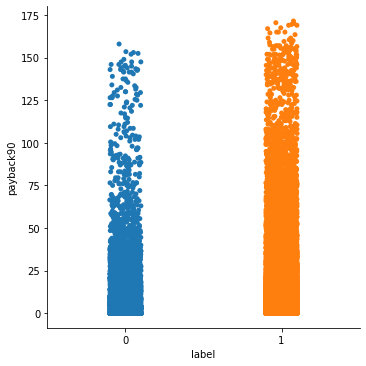

In [18]:
list=['aon',
'daily_decr30',
'daily_decr90',
'rental30',
'rental90',
'last_rech_date_ma',
'last_rech_date_da',
'last_rech_amt_ma',
'cnt_ma_rech30',
'fr_ma_rech30',
'sumamnt_ma_rech30',
'medianamnt_ma_rech30',
'medianmarechprebal30',
'cnt_ma_rech90',
'fr_ma_rech90',
'sumamnt_ma_rech90',
'medianamnt_ma_rech90',
'medianmarechprebal90',    
'cnt_da_rech30',           
'fr_da_rech30',            
'cnt_da_rech90',
'fr_da_rech90',  
'cnt_loans30',             
'amnt_loans30',            
'maxamnt_loans30',         
'medianamnt_loans30',      
'cnt_loans90',             
'amnt_loans90',            
'maxamnt_loans90',         
'medianamnt_loans90',      
'payback30',               
'payback90']

for i in list:
    sns.catplot(x='label',y=i,data=data)
    plt.show()

# Doing Bivariate analysis on all the columns with the target column 'Label'

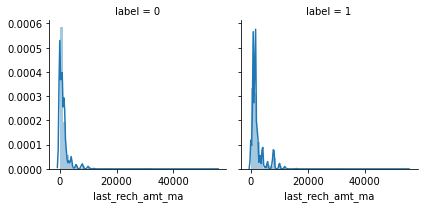

In [19]:
#Facegrid
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'last_rech_amt_ma')
plt.show()

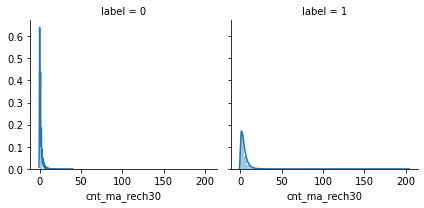

In [20]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'cnt_ma_rech30')
plt.show()

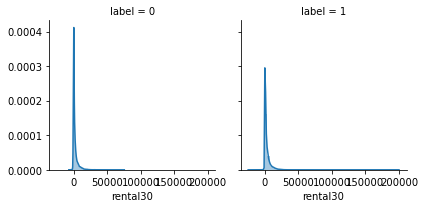

In [21]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'rental30')
plt.show()

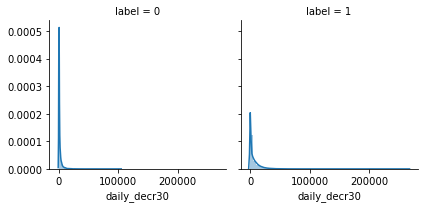

In [22]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'daily_decr30')
plt.show()

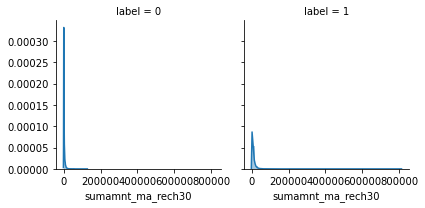

In [23]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'sumamnt_ma_rech30')
plt.show()

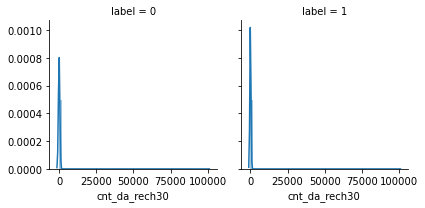

In [24]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'cnt_da_rech30')
plt.show()

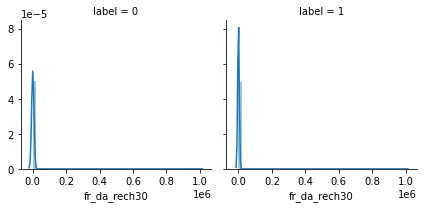

In [25]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'fr_da_rech30')
plt.show()

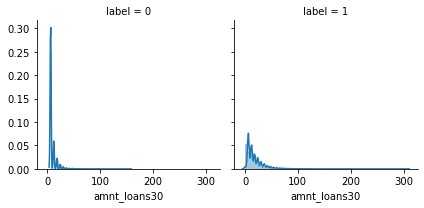

In [26]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'amnt_loans30')
plt.show()

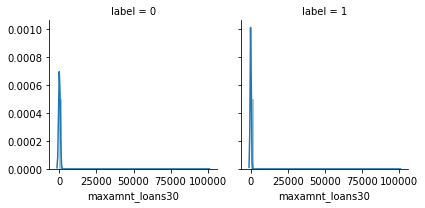

In [27]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'maxamnt_loans30')
plt.show()

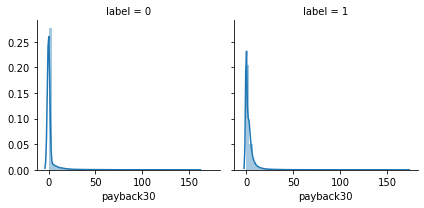

In [28]:
face=sns.FacetGrid(data,col='label')
face.map(sns.distplot,'payback30')
plt.show()

In [29]:
# Checking of skewness in the dataset.
data.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

# there is a skewness in every column except in the column 'maxamnt_loans90'

<AxesSubplot:>

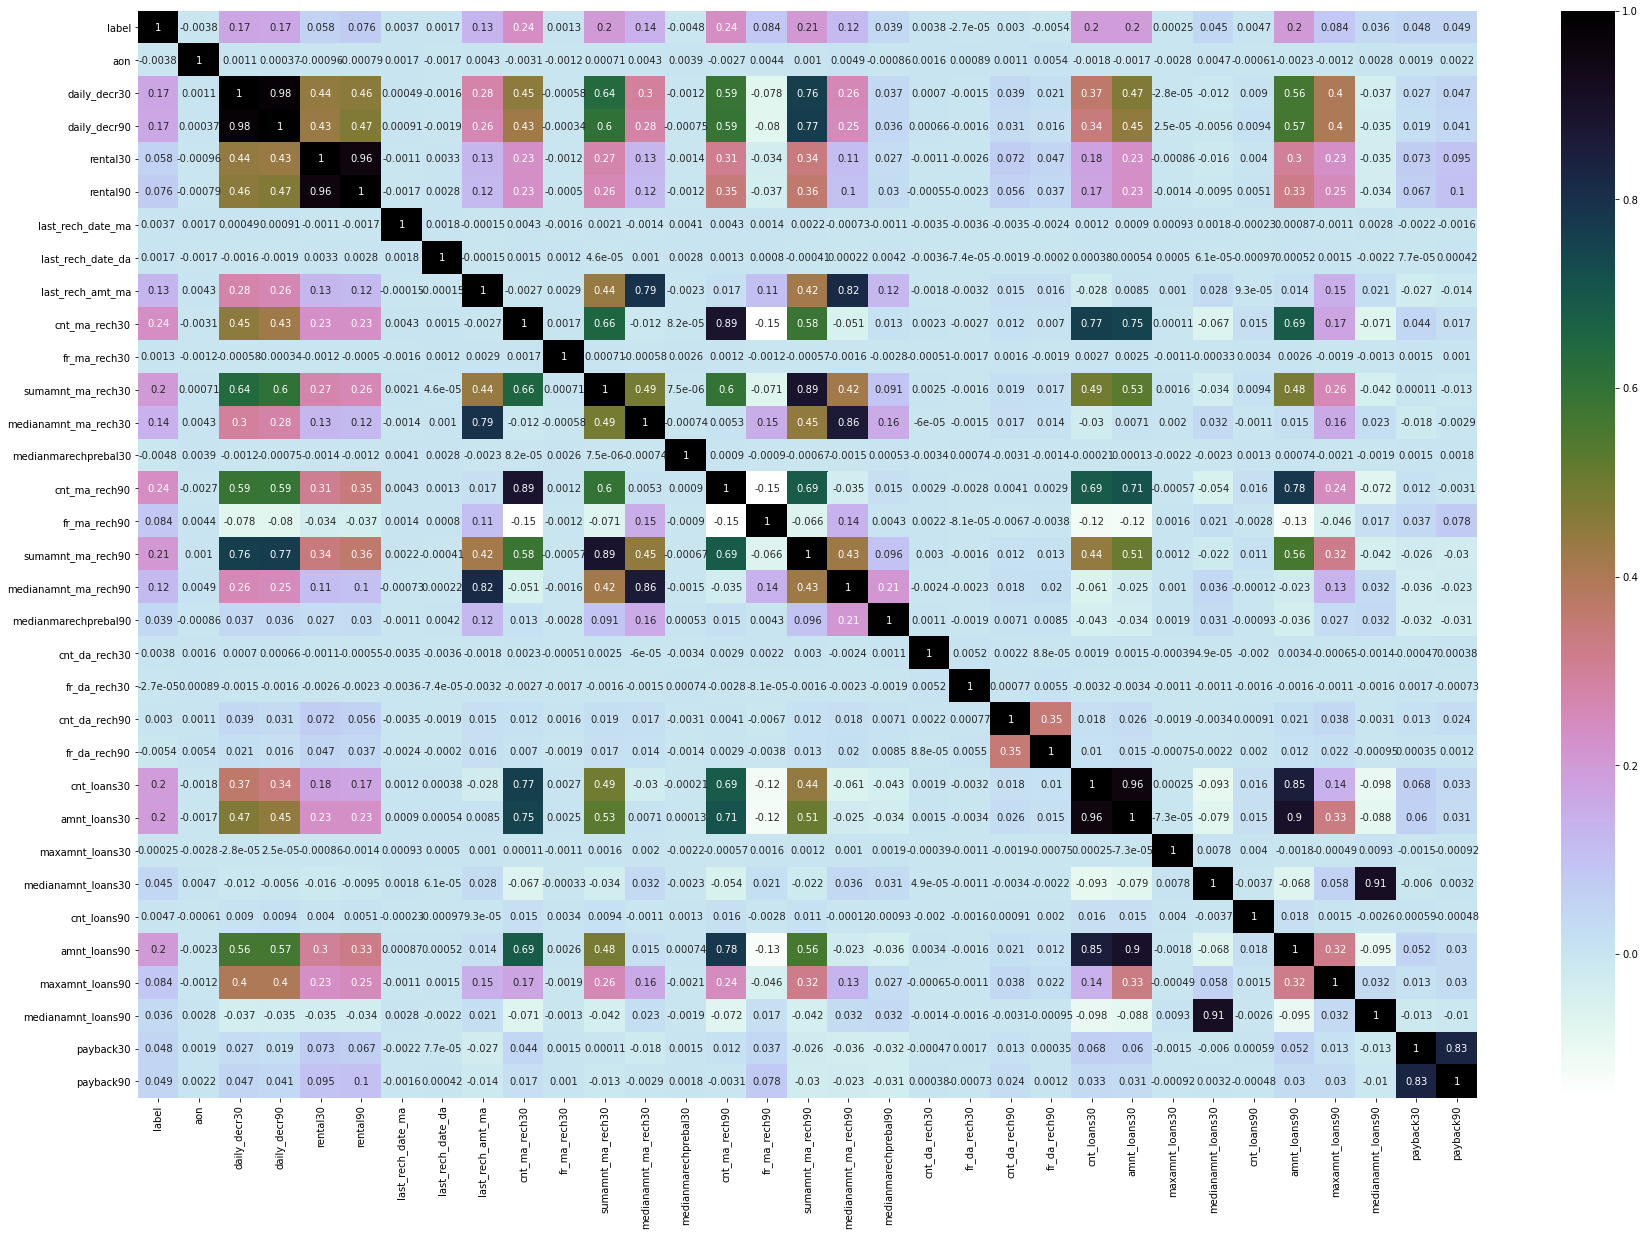

In [30]:
# Plotting of correlation matrix.

plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')

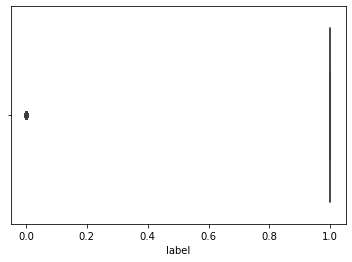

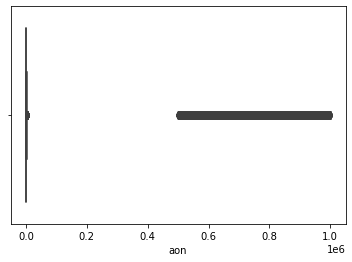

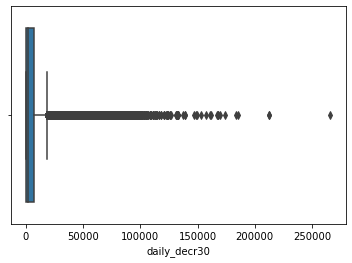

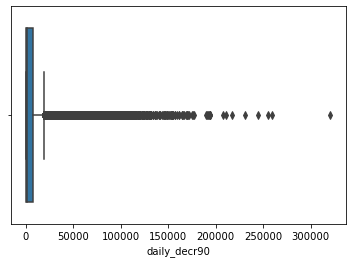

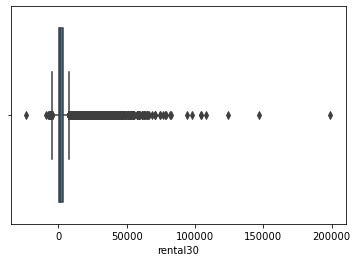

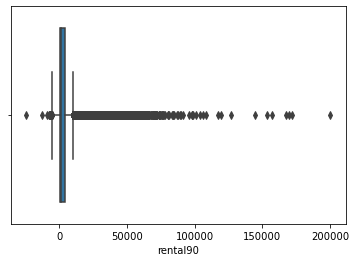

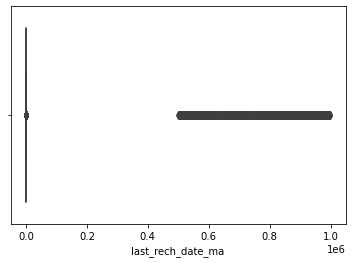

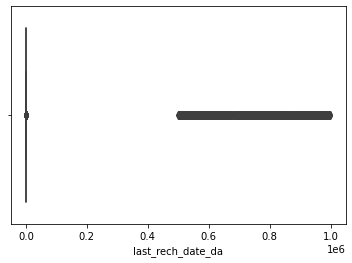

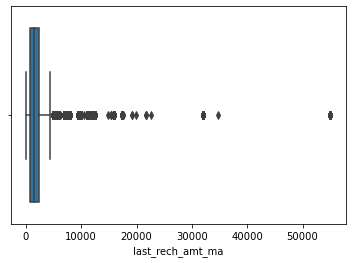

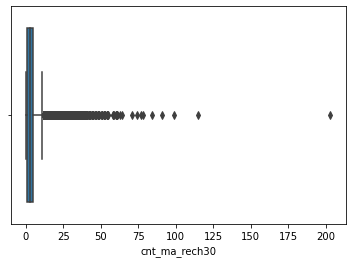

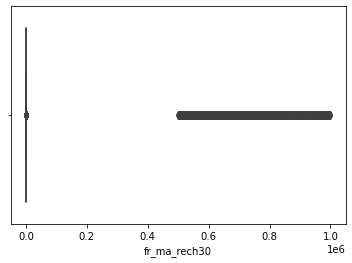

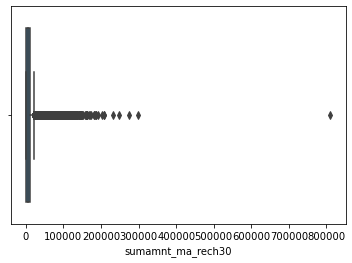

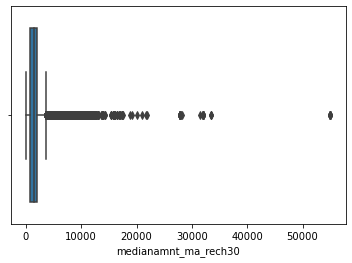

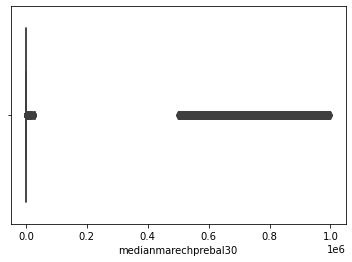

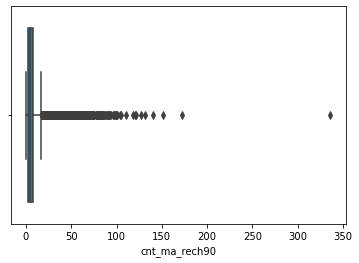

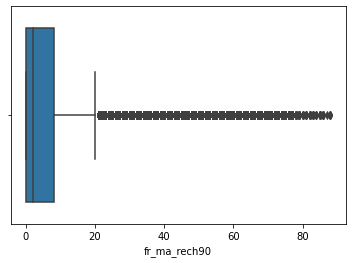

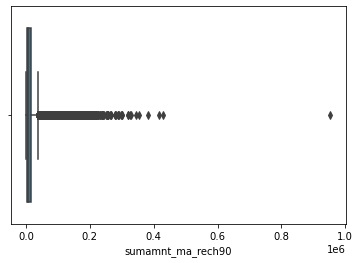

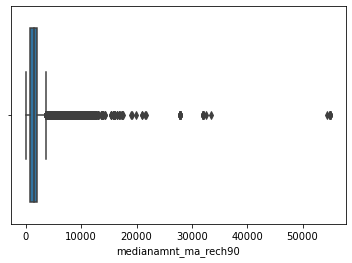

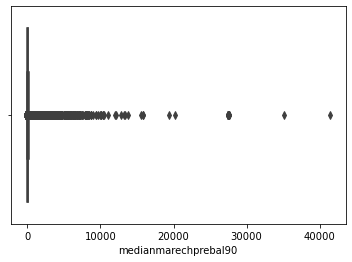

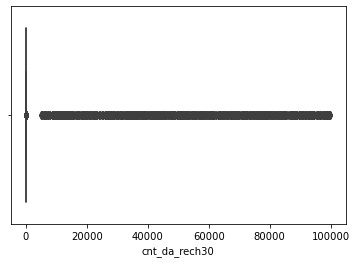

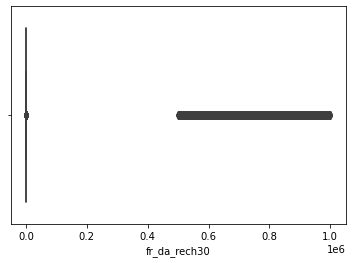

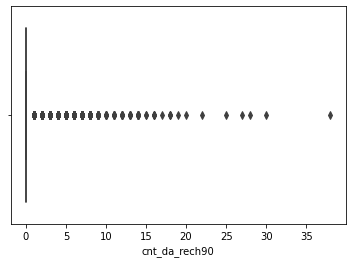

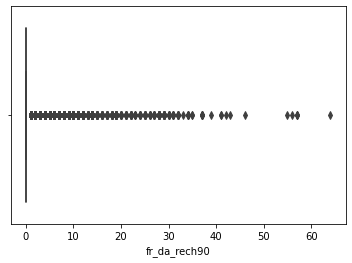

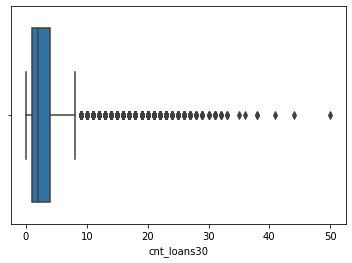

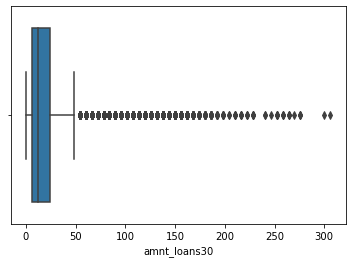

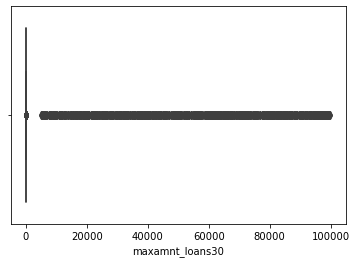

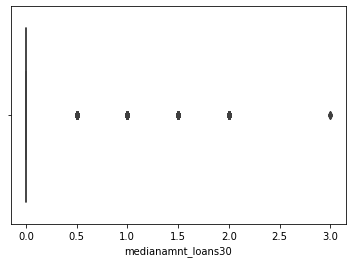

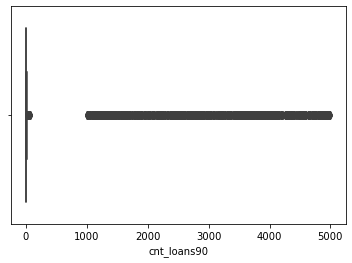

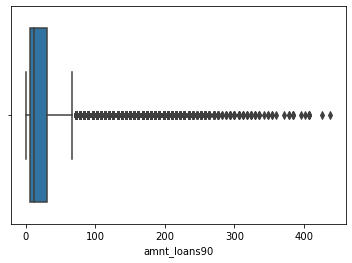

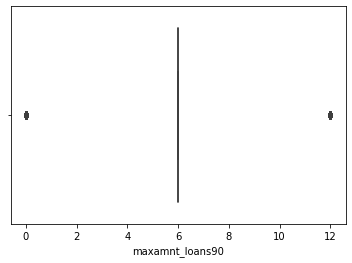

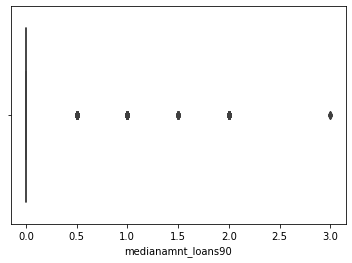

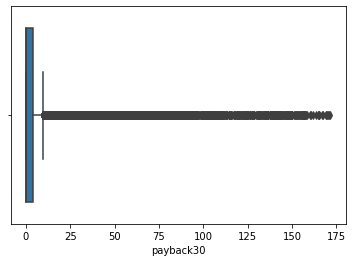

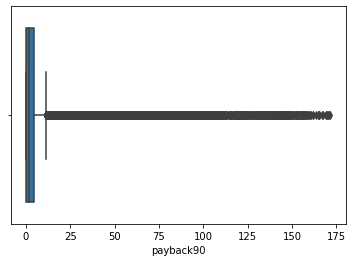

In [31]:
# Checking for Outliers
for l in data.columns:
    sns.boxplot(data[l])
    plt.show()

In [32]:
#Removing of skewness using Powertransform function.

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
for i in data.skew().index[1:]:
    if data.skew().loc[i]>0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    if data.skew().loc[i]<-0.55:
        data[i]=pt.fit_transform(data[i].values.reshape(-1,1))
    else:
        data[i]=data[i]

In [33]:
data.skew()

label                   -2.270254
aon                      1.654517
daily_decr30            -1.881629
daily_decr90            -2.110410
rental30                -8.837902
rental90                -8.390616
last_rech_date_ma        0.858560
last_rech_date_da      -17.770019
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.119058
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     7.506286
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30          0.545064
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans9

In [34]:
#Removing of outliers using Zscore.

z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]

In [35]:
data_new.skew()

label                   -2.159019
aon                     -1.038898
daily_decr30             0.369195
daily_decr90             0.402993
rental30                 1.454013
rental90                 1.481811
last_rech_date_ma       -2.012530
last_rech_date_da       26.502776
last_rech_amt_ma        -0.175943
cnt_ma_rech30           -0.069867
fr_ma_rech30             0.155680
sumamnt_ma_rech30       -0.416965
medianamnt_ma_rech30    -0.280345
medianmarechprebal30    -8.453823
cnt_ma_rech90           -0.065980
fr_ma_rech90             0.163465
sumamnt_ma_rech90       -0.326428
medianamnt_ma_rech90    -0.173019
medianmarechprebal90     2.441925
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              0.385326
amnt_loans30             0.551211
maxamnt_loans30          2.391587
medianamnt_loans30       0.000000
cnt_loans90              0.304891
amnt_loans90             0.410962
maxamnt_loans9

In [36]:
# Checking for total defaulters as it is imbalanced data.

defaulter=data_new[data_new['label']==0]
non_defaulter=data_new[data_new['label']==1]

In [37]:
defaulter.shape

(22722, 33)

In [38]:
non_defaulter.shape

(147866, 33)

In [39]:
# Splitting the data into x and y for train test split.

x=data_new.drop(['label'],axis=1)
y=data_new['label']

In [40]:
# Scaling the data using MinMaxScaler.
mnm=MinMaxScaler()
data_new=mnm.fit_transform(x)
x=pd.DataFrame(data_new,columns=x.columns)
x

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.813701,0.537692,0.533484,0.404357,0.404425,0.825972,0.0,0.457817,0.303833,0.664758,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.899577,0.855351
1,0.878275,0.681348,0.669122,0.561936,0.528684,0.897463,0.0,0.752981,0.191655,0.000000,...,0.000000,0.205054,1.0,0.0,0.000000,0.188656,1.0,0.0,0.000000,0.000000
2,0.856773,0.477951,0.476219,0.442185,0.432773,0.834295,0.0,0.457817,0.191655,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,0.807018,0.307904,0.311307,0.400381,0.399172,0.933739,0.0,0.379862,0.000000,0.000000,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.000000,0.000000
4,0.901988,0.364551,0.366776,0.452069,0.440683,0.841216,0.0,0.534037,0.575397,0.320627,...,0.712129,0.604379,0.0,0.0,0.570995,0.525733,0.0,0.0,0.515623,0.442603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170583,0.809885,0.749474,0.734094,0.573683,0.572034,0.825972,0.0,0.457817,0.637220,0.432723,...,0.664163,0.753458,1.0,0.0,0.720431,0.790346,1.0,0.0,0.567938,0.448216
170584,0.837642,0.364859,0.367076,0.451594,0.440303,0.815295,0.0,0.659283,0.383454,0.320627,...,0.265182,0.205054,0.0,0.0,0.218509,0.188656,0.0,0.0,0.337636,0.280942
170585,0.913313,0.320991,0.324183,0.481480,0.464205,0.841216,0.0,0.351039,0.445230,0.216303,...,0.421337,0.331293,0.0,0.0,0.344201,0.299398,0.0,0.0,0.337636,0.280942
170586,0.907944,0.678432,0.666957,0.639906,0.669715,0.834295,0.0,0.457817,0.495716,0.539287,...,0.526950,0.604379,1.0,0.0,0.534332,0.590854,1.0,0.0,0.625200,0.540715


# Using SMOTETomek for handling Imbalanced data which uses under_sampling method

In [41]:
!pip install imblearn

In [48]:
#from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [49]:
smt=SMOTE(random_state=42)

In [53]:
# X_res, y_res = smt.fit_resample(x,y)
smt = SMOTE()
X_res, y_res = smote.fit_resample(x,y)

In [54]:
X_res.shape

(295732, 32)

In [55]:
y_res.shape

(295732,)

In [56]:
y_res.value_counts()

1    147866
0    147866
Name: label, dtype: int64

# training and testing the data using train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=40)

# Model Building

In [59]:
# Logistic Regression

lg = LogisticRegression()
lg.fit(x_train, y_train)

LogisticRegression()

In [61]:
pred = lg.predict(x_test)

In [62]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7781785392245266
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     44480
           1       0.78      0.76      0.77     44240

    accuracy                           0.78     88720
   macro avg       0.78      0.78      0.78     88720
weighted avg       0.78      0.78      0.78     88720



In [66]:
# gaussian = GaussianNB()

gaussian = GaussianNB()
gaussian.fit(x_train,y_train)

GaussianNB()

In [67]:
pred = gaussian.predict(x_test)

In [68]:
print(accuracy_score(y_test, pred))

0.7295198376916141


In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76     44480
           1       0.82      0.59      0.68     44240

    accuracy                           0.73     88720
   macro avg       0.75      0.73      0.72     88720
weighted avg       0.75      0.73      0.72     88720



In [70]:
# DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
pred = dt.predict(x_test)

In [72]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8868688007213706
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     44480
           1       0.89      0.88      0.89     44240

    accuracy                           0.89     88720
   macro avg       0.89      0.89      0.89     88720
weighted avg       0.89      0.89      0.89     88720



In [73]:
# RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
pred = rf.predict(x_test)

In [75]:
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9368011722272317
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     44480
           1       0.94      0.93      0.94     44240

    accuracy                           0.94     88720
   macro avg       0.94      0.94      0.94     88720
weighted avg       0.94      0.94      0.94     88720



# Cross-Validation

In [77]:
#we will use cross_validation to check whether model is overfitted
from sklearn.model_selection import cross_val_score
cross_val_score(lg,x,y,cv=5)

#now i will take the mean of it

cross_val_score(lg,x,y,cv=5).mean()

0.8779867340055759

In [78]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(gaussian,x,y,cv=5)

#now i will take the mean of it

cross_val_score(gaussian,x,y,cv=5).mean()

0.6447581507306515

In [79]:
#we will use cross_validation to check whether model is overfitted

cross_val_score(dt,x,y,cv=5)

#now i will take the mean of it

cross_val_score(dt,x,y,cv=5).mean()

0.8606115492374945

In [80]:
cross_val_score(rf,x,y,cv=5)

#now i will take the mean of it

cross_val_score(rf,x,y,cv=5).mean()

0.9094367718931669

In [57]:
#list=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
#for g in list:
    #print('for the algorithm: ',g)
    #x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=.30,random_state=40)
    #g.fit(x_train,y_train)
    #pred=g.predict(x_test)
    #accuracy=accuracy_score(pred,y_test)
    #scr=g.score(x_train,y_train)
    #pred=g.predict(x_test)
    #accuracy=accuracy_score(pred,y_test)
    #print('The score is: ',scr)
    #print('Accuracy score is: ',accuracy)
    #print('confusion matrix: \n',confusion_matrix(pred,y_test))
    #print('classification report: \n',classification_report(pred,y_test))

for the algorithm:  LogisticRegression()
The score is:  0.7792495121055785
Accuracy score is:  0.7781785392245266
confusion matrix: 
 [[35200 10400]
 [ 9280 33840]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.77      0.78     45600
           1       0.76      0.78      0.77     43120

    accuracy                           0.78     88720
   macro avg       0.78      0.78      0.78     88720
weighted avg       0.78      0.78      0.78     88720

for the algorithm:  GaussianNB()
The score is:  0.7293248700558421
Accuracy score is:  0.7295198376916141
confusion matrix: 
 [[38640 18157]
 [ 5840 26083]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.68      0.76     56797
           1       0.59      0.82      0.68     31923

    accuracy                           0.73     88720
   macro avg       0.73      0.75      0.72     88720
weighted avg       0.77      

KeyboardInterrupt: 

In [ ]:
# applying cross validation to the best model to see if it is under fitting or over fitting
#from sklearn.model_selection import cross_val_score
#list=[RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),LogisticRegression()]
#for m in list:
    #print(m,'\n')
    #cv=cross_val_score(m,x,y,cv=5)
    #print('The cross validation score is: ',cv)
    #print('The mean and standard deviations are: ',cv.mean(),cv.std())
    #print('\n')

# Hyperparameter tunning using Kfold

In [81]:
from sklearn.model_selection import KFold
lg=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5)

# Hyperparameter tuning using GridSearchCV for Logistic Regression

In [82]:
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 100.0, 'penalty': 'l2'}


# Hyperparameter tuning using GridSearchCV for RandomForestClassifier to find out best parameteres.

In [83]:
params={'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,params,n_jobs=-1,scoring='accuracy')
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 200}


# Hyperparameter tuning using GridSearchCV for SVC to find out best params.

In [ ]:
#params={'kernel':['linear','poly','rbf']}
#svc=SVC()
#clf=GridSearchCV(svc,params,n_jobs=-1,scoring='accuracy')
#clf.fit(x_train,y_train)
#print(clf.best_params_ )

# Hyperparameter tuning using GridSearchCV for DecisionTreeClassifier to find out best params.

In [84]:
params={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier()
clf=GridSearchCV(dtc,params,n_jobs=-1,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'entropy'}


In [85]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=200)
dt=DecisionTreeClassifier(criterion='entropy')
lg=LogisticRegression(C=100.0,penalty='l2')

In [86]:
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('DecisionTreeClassifier',dt))
Model.append(('LogisticRegression',lg))

RandomForestClassifier 

RandomForestClassifier(criterion='entropy', n_estimators=200)


Accuracy Score:  0.9371956717763751


F1 Score:  0.9367666084114483
[[41875  2605]
 [ 2967 41273]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     44480
           1       0.94      0.93      0.94     44240

    accuracy                           0.94     88720
   macro avg       0.94      0.94      0.94     88720
weighted avg       0.94      0.94      0.94     88720



AxesSubplot(0.125,0.808774;0.775x0.0712264)


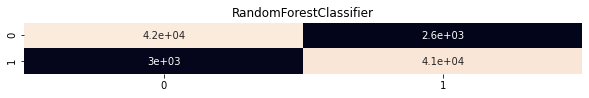

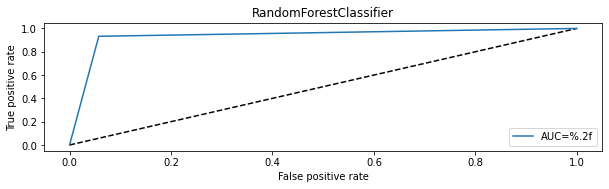



DecisionTreeClassifier 

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.8928201082055907


F1 Score:  0.891510456479823
[[40141  4339]
 [ 5170 39070]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     44480
           1       0.90      0.88      0.89     44240

    accuracy                           0.89     88720
   macro avg       0.89      0.89      0.89     88720
weighted avg       0.89      0.89      0.89     88720



AxesSubplot(0.125,0.808774;0.775x0.0712264)


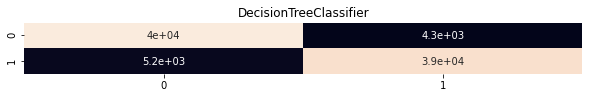

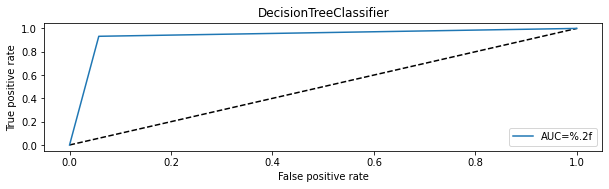



LogisticRegression 

LogisticRegression(C=100.0)


Accuracy Score:  0.7787195671776375


F1 Score:  0.7748830382533712
[[35300  9180]
 [10452 33788]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.79      0.78     44480
           1       0.79      0.76      0.77     44240

    accuracy                           0.78     88720
   macro avg       0.78      0.78      0.78     88720
weighted avg       0.78      0.78      0.78     88720



AxesSubplot(0.125,0.808774;0.775x0.0712264)


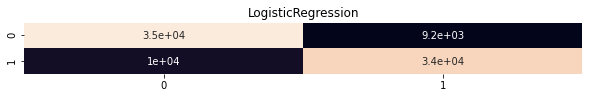

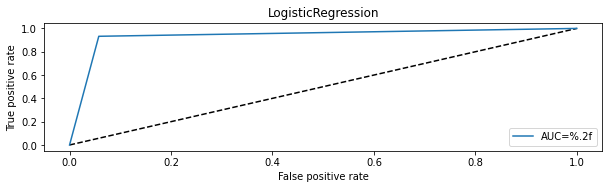

In [95]:
Models=[]
Score=[]
Roc_Score=[]
F1=[]

for name,model in Model:
    print(name, '\n')
    Models.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
# Accuracy Matrix
    a=accuracy_score(y_test,pred)
    print('Accuracy Score: ',a)
    Score.append(a*100)
    print('\n')
    
# F1 Score
    f=f1_score(y_test,pred)
    print('F1 Score: ',f)
    F1.append(f)
    
    
#Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
#Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
#Confusion Matrix using Heatmap
    plt.figure(figsize=(10,10))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False))
    plt.show()
    print('\n')
    
#Auc_Roc_curve
    plt.figure(figsize=(10,25))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [96]:
pd.DataFrame({"Models":Models,"Accuracy Score":Score,'F1 Score':F1})

,Models,Accuracy Score,F1 Score
0,RandomForestClassifier,93.719567,0.936767
1,DecisionTreeClassifier,89.282011,0.891510
2,LogisticRegression,77.871957,0.774883


# Saving the best model Random Forest Classifier with best parameters.

In [97]:
import joblib
joblib.dump(rf,'microcredit_Defaulter_Indonesia.pkl')

['microcredit_Defaulter_Indonesia.pkl']